In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
%matplotlib inline

/home/ashwin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (294,299,300,302,307,313,315,365,367,369) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/home/ashwin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (294,299,300,302,313,315,365,367,369) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


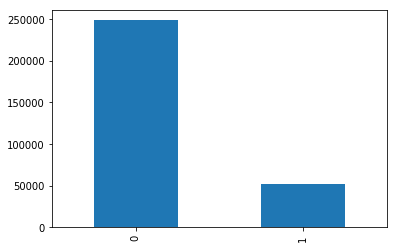

In [2]:
train_data=pd.read_csv('/home/ashwin/Downloads/AV/churn/train.csv')
test_data=pd.read_csv('/home/ashwin/Downloads/AV/churn/test.csv')
train_data['Responders'].value_counts().plot(kind='bar')

In [3]:
train_data['Responders'].value_counts()
list(train_data)
train_data.isnull().sum()
train_data.shape[0]

300000

In [4]:
target=train_data['Responders']

In [4]:
target=train_data['Responders']
train_data.drop(['Responders'],axis=1)
#combain_data=pd.concat([train_data,test_data],axis=0)
combain_data=train_data.append(test_data)
print(combain_data.shape)
combain_data.isnull().sum()
combain_data=combain_data.dropna(thresh=0.8*(len(combain_data)),axis=1)
combain_data.shape
print(combain_data.describe())

(500000, 377)


       ATM_C_prev1  ATM_C_prev2  ATM_C_prev3  ATM_C_prev4  ATM_C_prev5  \
count     500000.0     500000.0     500000.0     500000.0     500000.0   
mean           0.0          0.0          0.0          0.0          0.0   
std            0.0          0.0          0.0          0.0          0.0   
min            0.0          0.0          0.0          0.0          0.0   
25%            0.0          0.0          0.0          0.0          0.0   
50%            0.0          0.0          0.0          0.0          0.0   
75%            0.0          0.0          0.0          0.0          0.0   
max            0.0          0.0          0.0          0.0          0.0   

       ATM_C_prev6   ATM_D_prev1   ATM_D_prev2   ATM_D_prev3   ATM_D_prev4  \
count     500000.0  5.000000e+05  5.000000e+05  5.000000e+05  5.000000e+05   
mean           0.0  8.743619e+03  9.100736e+03  9.128096e+03  8.350384e+03   
std            0.0  3.501787e+04  3.666988e+04  3.651433e+04  3.313372e+04   
min            0.0  0

In [5]:
numerical_var=[f for f in combain_data.columns if combain_data.dtypes[f] 
        != 'object']
catagorical_var=[f for f in combain_data.columns if(combain_data.dtypes[f] 
                 == 'object' or combain_data.dtypes[f] == 'str')]
numerical_var
numclasses=[]
for c in numerical_var:
    numclasses.append(int(len(np.unique(combain_data[[c]]))))

threshold=10
categorical_variables1 = list(np.array(numerical_var)[np.array(numclasses)<int(threshold)])
print(categorical_variables1)

#numclasses=[]
#for c in categorical_variables1:
#    numclasses.append(int(len(np.unique(combain_data[[c]]))))

#threshold=1
#categorical_variables1 = list(np.array(categorical_variables1)[np.array(numclasses)>int(threshold)])
#print(len(categorical_variables1))

['ATM_C_prev1', 'ATM_C_prev2', 'ATM_C_prev3', 'ATM_C_prev4', 'ATM_C_prev5', 'ATM_C_prev6', 'COUNT_ATM_C_prev1', 'COUNT_ATM_C_prev2', 'COUNT_ATM_C_prev3', 'COUNT_ATM_C_prev4', 'COUNT_ATM_C_prev5', 'COUNT_ATM_C_prev6', 'COUNT_MB_C_prev1', 'COUNT_MB_C_prev2', 'COUNT_MB_C_prev3', 'COUNT_MB_C_prev4', 'COUNT_MB_C_prev5', 'COUNT_MB_C_prev6', 'COUNT_POS_C_prev1', 'COUNT_POS_C_prev2', 'COUNT_POS_C_prev3', 'COUNT_POS_C_prev4', 'COUNT_POS_C_prev5', 'COUNT_POS_C_prev6', 'MB_C_prev1', 'MB_C_prev2', 'MB_C_prev3', 'MB_C_prev4', 'MB_C_prev5', 'MB_C_prev6', 'MB_D_prev1', 'MB_D_prev2', 'MB_D_prev3', 'MB_D_prev4', 'MB_D_prev5', 'MB_D_prev6', 'POS_C_prev1', 'POS_C_prev2', 'POS_C_prev3', 'POS_C_prev4', 'POS_C_prev5', 'POS_C_prev6']


In [6]:
combain_data=combain_data.drop(categorical_variables1,axis=1)

In [7]:
combain_data.shape

(500000, 173)

In [8]:
len(catagorical_var)
#catagorical_var.extend(categorical_variables1)
numerical_var=[f for f in combain_data.columns if f not in list(catagorical_var)]
print(len(catagorical_var))
print(len(numerical_var))

12
161


In [9]:
for c in numerical_var:
    combain_data[c].fillna(combain_data[c].mean(), inplace=True)
for c in catagorical_var:
    combain_data[c].fillna(combain_data[c].mode()[0], inplace=True)
print(combain_data.head())
combain_data.columns[combain_data.isnull().any()].tolist()

   ATM_D_prev1  ATM_D_prev2  ATM_D_prev3  ATM_D_prev4  ATM_D_prev5  \
0          0.0          0.0     100000.0          0.0      55000.0   
1      18000.0      25000.0      30000.0       5000.0      18500.0   
2          0.0          0.0          0.0          0.0        100.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

   ATM_D_prev6   BAL_prev1   BAL_prev2   BAL_prev3   BAL_prev4    ...     \
0          0.0   743952.92   943952.92  1014344.86  1037802.92    ...      
1      19000.0  8034290.99  6471503.11  5543465.03  5973512.08    ...      
2          0.0   317922.94   217899.88     4629.43     4413.95    ...      
3          0.0   856120.91   856120.91   856120.91   856120.91    ...      
4          0.0   412330.33    44476.32    61112.77    71949.97    ...      

   count_D_prev1  count_D_prev2  count_D_prev3  count_D_prev4  count_D_prev5  \
0              1              0           

[]

In [15]:
for c in numerical_var:
    print(stats.skew((combain_data[c])))

12.365363810121115
14.362871079960733
12.950211026536396
13.430267329588965
14.86716325131893
13.907579588894066
185.19255920900466
187.06532917794036
149.4881042384556
147.9669843992119
144.61832522231012
153.8946495930514
205.87791050684106
238.41501722606637
161.7694161811877
226.86424206556342
234.73878547613765
229.2401973367788
270.6475905642187
258.7776343626194
192.46208201085565
221.3634860420618
316.81562775432036
253.61495423956953
13.756538289933577
7.997079943267448


93.087751302152
122.1780536111029
100.76677572315523
77.18230391392702
196.50608902610847
74.22640113087519
9.138010477068407
9.31679753417751
8.932101410596054
8.229702851683603
8.333527096931125
9.401995216476033
530.3005220720191
636.222245227449
704.4780109576669
388.4993922203894
698.0072289603125
641.0305003645492
406.1443775551392
419.0955808513332
445.11988191591433
554.7543984770721


618.3242812767983
673.9804937658175
52.28567796948967
59.469256587424894
31.15969877977428
50.149477085837
49.144391330150626
104.46021663755724
8.088872757856969
7.953152103948544
8.612195174521029
9.964029838901926
11.103187077132256
9.663838665792333
84.65570206957089
80.32852871444086
81.9549979979284
39.95754951919075
31.228252462133355
42.19121660795337


29.84146170186514
22.42080730582217
21.480120958461196
20.83548438512197
23.22546573944224
23.867692528886373
650.5769095507922
421.02012165146687
298.89672820994485
607.0215003339213
362.6156456684078
185.099775098405
187.05963334175294
149.49921410336225
147.960606986173
144.6384150026794
153.93332488664942
193.18291197385165
227.39451535924363
154.87028143574062
221.45017295388107
217.84328548445097
207.49226216355547
46.73387880025561


258.8238732960893
248.40565898467855
183.37076451218488
215.66882075047872
310.9291816918938
242.2377317043011
236.8600154330515
184.25198265809547
188.9003756761258
227.43538326345035
164.15799128219223
155.10939817432927
154.3136751551039
155.06784288010905
184.86406351878304
179.7694659568707
260.86632585672885
149.61681126600416
135.90855343223961
201.4115746392953
280.88052247854034
195.68294562022976
300.955807993851


150.00032667929142
225.0968302689252
103.62595574315365
110.48030515044344
111.892786772057
162.2506124617726
149.73492000297753
83.25854923055418
81.61562646568227
162.22280942593457
149.7443618446773
231.21179604161912
180.05494424787616
4.225815950179919
66.77689481675621
24.925397741123334
22.93042456721981
31.912063330543205
22.33081855380505
23.154871384400604
89.29470706902987
124.14826340211877
6.979516798765435
2.318778901715229


1.7178920025665179
2.5850173679884447
132.68967374397948
137.0977524726517
-4.469522467942154e-19
0.31853761704366496
1.270213027868729
528.0697754084453
635.9467368363977
704.4711335274144
388.2908884135798
697.9811590414873
640.7520259598033
70.3862085750058
91.79591951413737
198.93208256581602
362.4808667451274
461.5768449645225
590.4100276879917
7.190573366179853
0.8823167275434096


0.2968735475768148


In [16]:
skewed=combain_data[numerical_var].apply(lambda x:stats.skew(x.dropna()))
skewed=skewed[skewed>0.75]
skewed=skewed.index
combain_data[skewed]=np.log1p(combain_data[skewed])

/home/ashwin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log1p
  after removing the cwd from sys.path.
/home/ashwin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log1p
  after removing the cwd from sys.path.


In [ ]:
dummies=pd.get_dummies(combain_data[catagorical_var])
dummies.shape

In [20]:
print(train_data.shape)
print(test_data.shape)


(300000, 377)
(200000, 376)


In [21]:
del train_data
del test_data
combain_data=combain_data.drop(catagorical_var,axis=1)

In [22]:
combain_data=pd.concat([combain_data,dummies],axis=1)

In [28]:
combain_data.shape

(500000, 5424)

In [29]:
combain_data.to_csv('/home/ashwin/Downloads/AV/churn/combain_data.csv')

In [ ]:
train_data=combain_data[0:300000]
test_data=combain_data[300000:]

In [36]:
del combain_data

In [38]:
sm = SMOTE(random_state=12,ratio=1,n_jobs=-1)
x_synthitic_data_tf,y_synthitic_data_tf = sm.fit_sample(train_data, target)
print(x_synthitic_data_tf.shape)
print( np.bincount(y_synthitic_data_tf))

In [ ]:
del train_data
del test_data

In [2]:
train_data=pd.read_csv(
    '/home/ashwin/Downloads/AV/churn/combain_data.csv',nrows=300000)

In [ ]:
test_data=pd.read_csv(
    '/home/ashwin/Downloads/AV/churn/combain_data.csv',skip=300000)

In [13]:
chunlsize=300000
validation_data=pd.read_csv('/home/ashwin/Downloads/AV/churn/combain_data.csv',skiprows=range(1,28000000),
                 chunksize=chunlsize)

In [ ]:
n_estimators=20
model=BaggingClassifier(SVC(C=500,kernel='rbf',gamma=0.01,
                            class_weight=[{0:0.2,1:0.8}],
     probability=True)
    , max_samples=1.0 / n_estimators, n_estimators=n_estimators,n_jobs=-1)

In [ ]:
for chunk in validation_data:
    print(list(chunk))